In [1]:
import warnings # For warning handling

# Third-party imports
import pandas as pd # for data manipulation and analysis, CSV file I/O
import numpy as np # For numerical operations and mathematical functions
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical graphics
from sklearn.model_selection import train_test_split # For data splitting (Training & Testing) in machine learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler # For feature standardization & Normalization
from sklearn.metrics import accuracy_score, classification_report # For model evaluation
from termcolor import colored # For colored text printing

# For warning handling
warnings.filterwarnings('ignore')

In [3]:
employee = pd.read_csv("C:\\Users\\Dell\\Downloads\\Employee.csv")
print(employee)

     Company   Age  Salary     Place Country  Gender
0        TCS  20.0     NaN   Chennai   India       0
1    Infosys  30.0     NaN    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]


In [23]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
print(employee.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


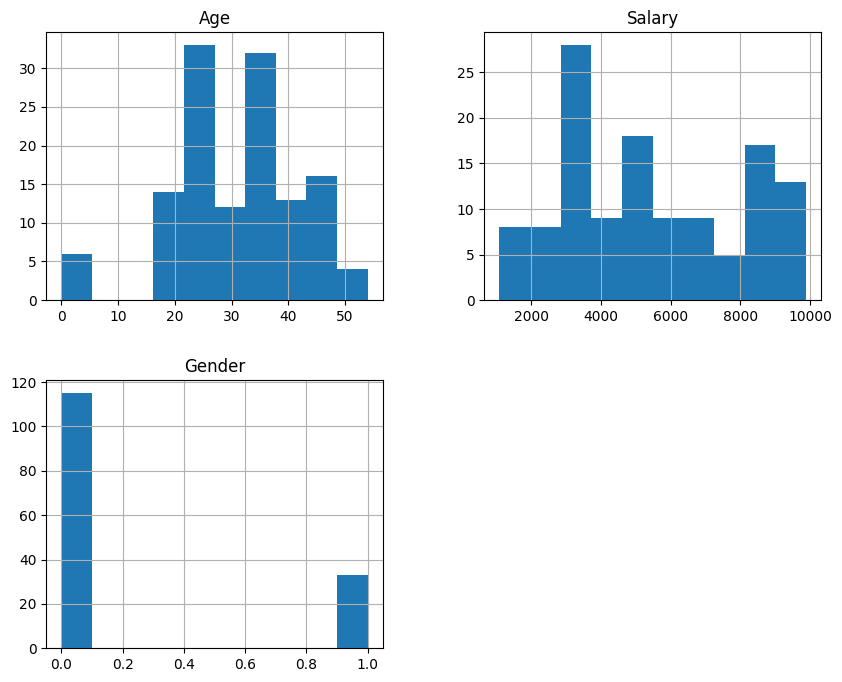

In [6]:
employee.hist(figsize=(10, 8))
plt.show()

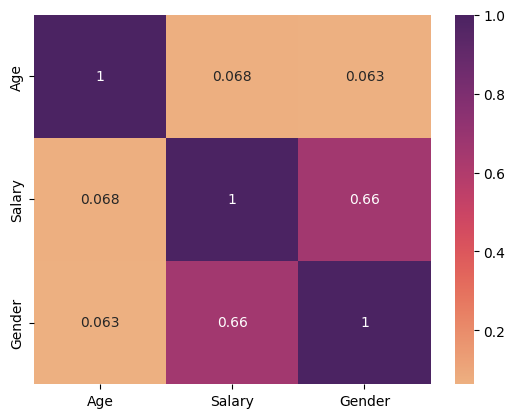

In [11]:
correlation_matrix = employee.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='flare')
plt.show()

In [24]:
# Check for missing values
null_counts = employee.isnull().sum()

# Display the number of null values
print(null_counts)


Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [81]:
## 1- Mean Imputation:
employee["Salary"] = employee["Salary"].fillna(employee["Salary"].mean())
## 1- Median Imputation:
employee["Salary"] = employee["Salary"].fillna(employee["Salary"].median())
## 2- Mode Imputatoin:
employee["Age"] = employee["Age"].fillna(employee["Age"].mode()[0])


0      5312.467742
1      5312.467742
2      2300.000000
3      3000.000000
4      4000.000000
          ...     
143    9024.000000
144    8787.000000
145    4034.000000
146    5034.000000
147    8202.000000
Name: Salary, Length: 148, dtype: float64


In [75]:
null_counts = employee.isnull().sum()
print(null_counts)
print("_________________________________________________________________")
print(colored(f"Totally, there are {null_counts.sum()} null values in the dataset.", "green", attrs=['reverse']))

Company          8
Age              0
Salary           0
Place           14
Country          0
Gender           0
data_encoded     0
dtype: int64
_________________________________________________________________
Totally, there are 22 null values in the dataset.


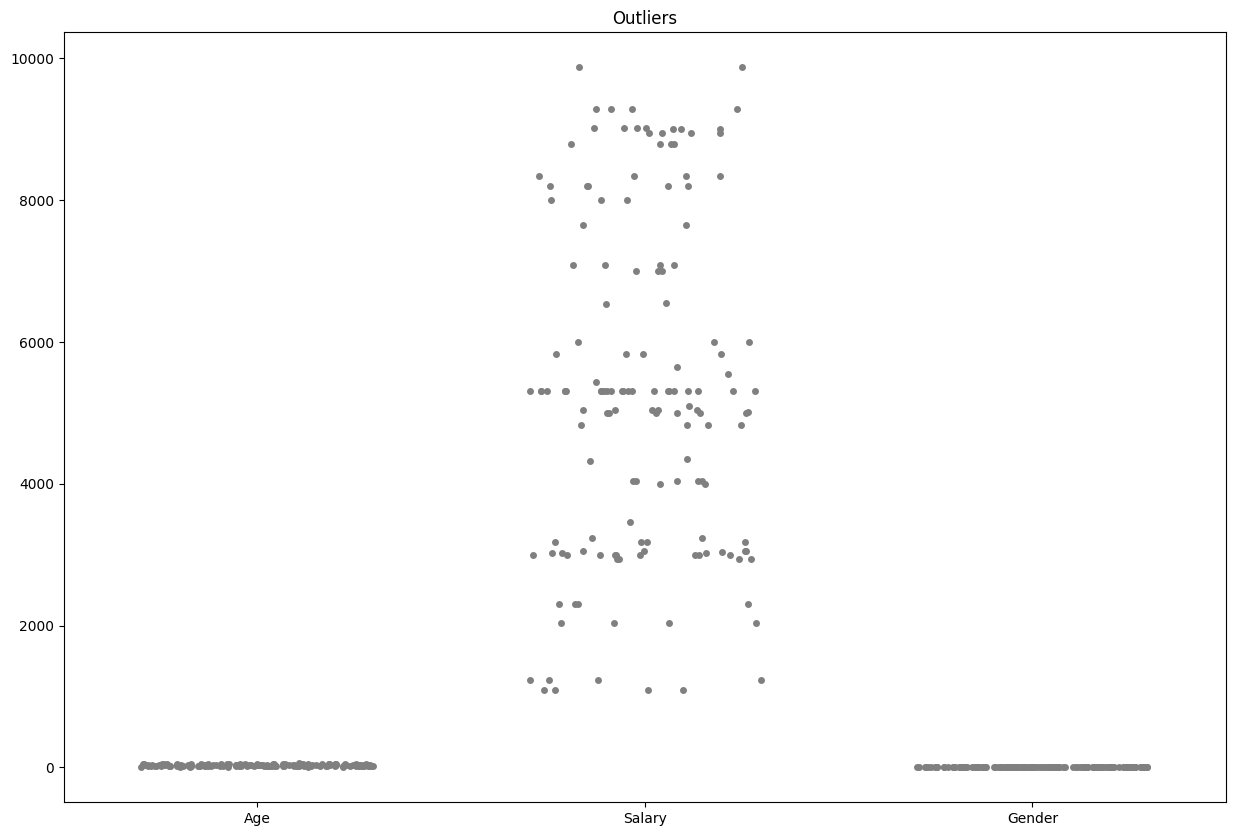

In [52]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = employee.get(["Company", "Age", "Salary", "Place","Country","Gender"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="grey", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

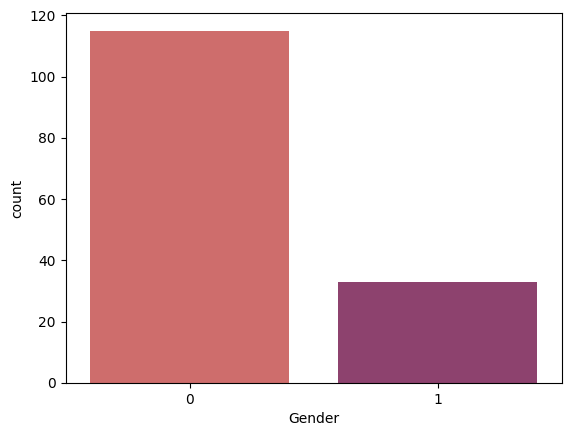

The number 0 being Male and 1 being Female


In [39]:
sns.countplot(x="Gender", data=employee, palette="pastel")
plt.show()
print("The number 0 being Male and 1 being Female")

Company
TCS                          53
Infosys                      45
CTS                          36
NaN                           8
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64


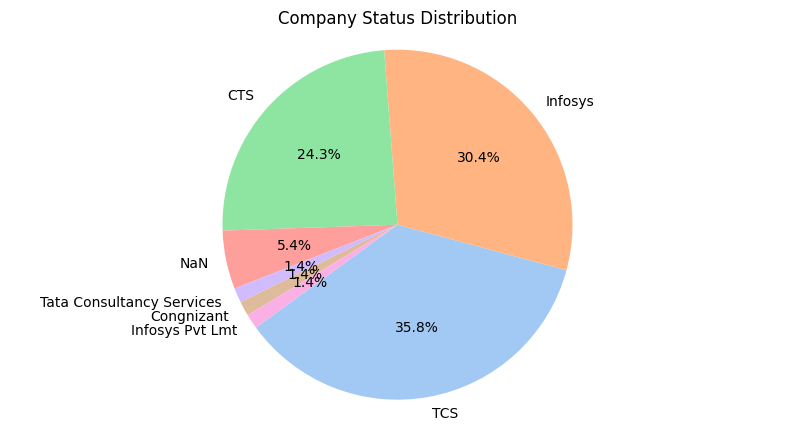

In [51]:
CompanyAnalysis = employee.Company.value_counts(dropna=False)
print(CompanyAnalysis)

# Create a pie chart "For Married feature"
plt.figure(figsize=(10, 5)) # figure in inches

# labels by descending order
plt.pie(CompanyAnalysis, 
        labels=[("TCS"),("Infosys"),("CTS"),("NaN"),("Tata Consultancy Services"),("Congnizant"),("Infosys Pvt Lmt")], 
        startangle=216, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(CompanyAnalysis)))

plt.axis('equal')  # Used to set the aspect ratio of the plot to be equal.
plt.title('Company Status Distribution')
plt.show()

Country
India    148
Name: count, dtype: int64


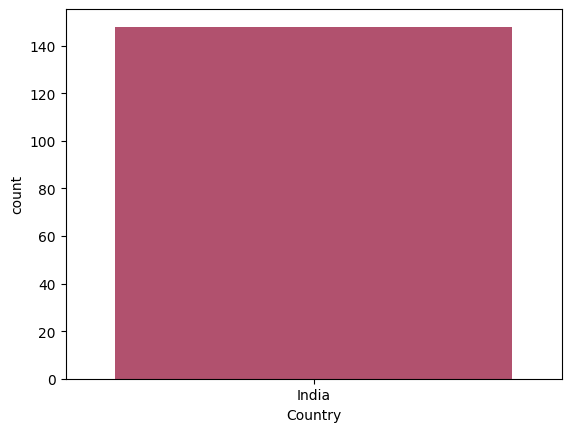

In [56]:
CountryAnalysis = employee.Country.value_counts(dropna=False)
print(CountryAnalysis)
sns.countplot(x="Country", data=employee, palette="flare")
plt.show()

The Average Income: 5312.47 
The ratio of people with income above average to below average: 57.45 
Number of people income above the average: 54
Number of people income below the average: 94


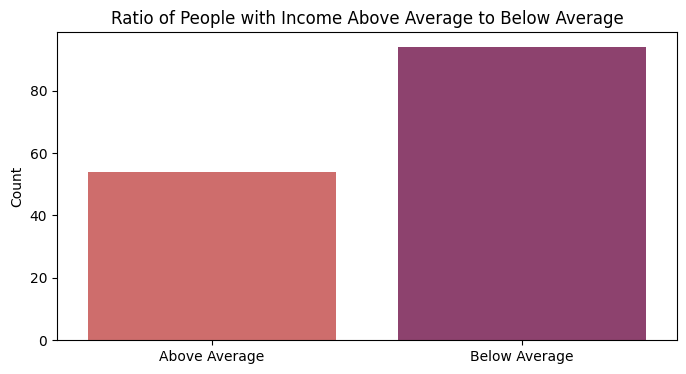

In [57]:
# Calculate the average income
average_income = employee['Salary'].mean()
print(f"The Average Income: {average_income:.2f} ")

# Count incomes higher and lower than average
above_average_count = (employee['Salary'] > average_income).sum()
below_average_count = (employee['Salary'] <= average_income).sum()

# Calculate ratio and print the results
ratio = above_average_count / below_average_count
print(f"The ratio of people with income above average to below average: {ratio*100:.2f} ")
print(f"Number of people income above the average: {above_average_count}")
print(f"Number of people income below the average: {below_average_count}")

# Plot the ratio using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="flare")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()

In [61]:
filtered_data = employee[(employee['Age'] > 40) & (employee['Salary'] < 5000)]
print(filtered_data)


     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


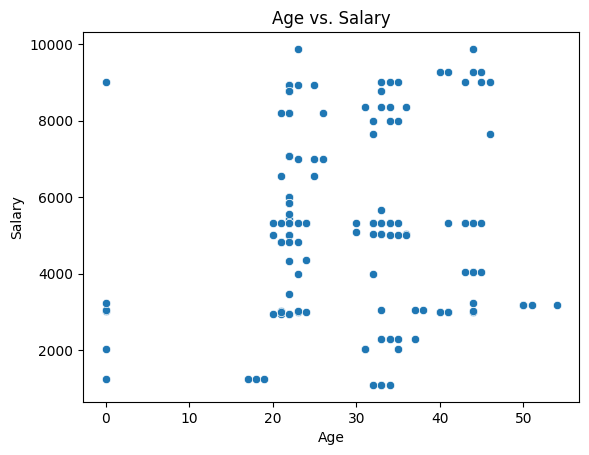

In [62]:
sns.scatterplot(x='Age', y='Salary', data=employee)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

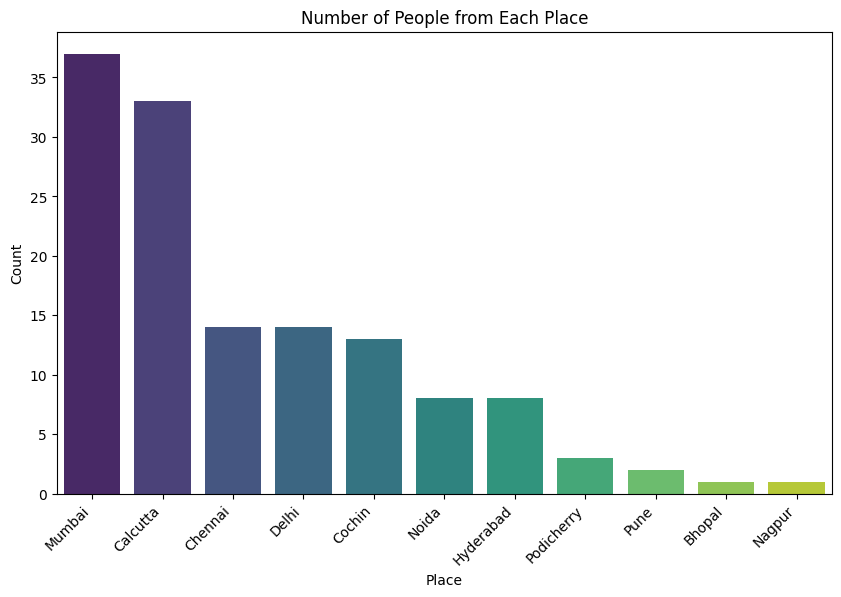

In [63]:
place_counts = employee['Place'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.index, y=place_counts, palette='viridis')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [72]:
encoded_data = pd.get_dummies(employee['Gender'])
data_encoded = pd.concat([employee, encoded_data], axis=1)
print(data_encoded)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
employee['data_encoded'] = le.fit_transform(employee['Gender'])
print(le)

     Company   Age       Salary     Place Country  Gender  data_encoded  \
0        TCS  20.0  5312.467742   Chennai   India       0             4   
1    Infosys  30.0  5312.467742    Mumbai   India       0            11   
2        TCS  35.0  2300.000000  Calcutta   India       0            16   
3    Infosys  40.0  3000.000000     Delhi   India       0            20   
4        TCS  23.0  4000.000000    Mumbai   India       0             7   
..       ...   ...          ...       ...     ...     ...           ...   
143      TCS  33.0  9024.000000  Calcutta   India       1            14   
144  Infosys  22.0  8787.000000  Calcutta   India       1             6   
145  Infosys  44.0  4034.000000     Delhi   India       1            23   
146      TCS  33.0  5034.000000    Mumbai   India       1            14   
147  Infosys  22.0  8202.000000    Cochin   India       0             6   

         0      1  
0     True  False  
1     True  False  
2     True  False  
3     True  False  

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
numerical_features = data_encoded.select_dtypes(include=['float', 'int']).columns
data_encoded[numerical_features] = scaler_standard.fit_transform(data_encoded[numerical_features])
data_encoded_minmax = data_encoded.copy()
data_encoded_minmax[numerical_features] = scaler_minmax.fit_transform(data_encoded_minmax[numerical_features])
print(numerical_features)
print(data_encoded_minmax)

Index(['Age', 'Salary', 'Gender', 'data_encoded'], dtype='object')
     Company       Age    Salary     Place Country  Gender  data_encoded  \
0        TCS  0.370370  0.480650   Chennai   India     0.0      0.142857   
1    Infosys  0.555556  0.480650    Mumbai   India     0.0      0.392857   
2        TCS  0.648148  0.137817  Calcutta   India     0.0      0.571429   
3    Infosys  0.740741  0.217480     Delhi   India     0.0      0.714286   
4        TCS  0.425926  0.331285    Mumbai   India     0.0      0.250000   
..       ...       ...       ...       ...     ...     ...           ...   
143      TCS  0.611111  0.903039  Calcutta   India     1.0      0.500000   
144  Infosys  0.407407  0.876067  Calcutta   India     1.0      0.214286   
145  Infosys  0.814815  0.335154     Delhi   India     1.0      0.821429   
146      TCS  0.611111  0.448959    Mumbai   India     1.0      0.500000   
147  Infosys  0.407407  0.809491    Cochin   India     0.0      0.214286   

         0      1  
